In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../../Data/Alcohol_Sales.csv',index_col= 'DATE', parse_dates = True)
df.index.freq = 'MS'

In [33]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [34]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

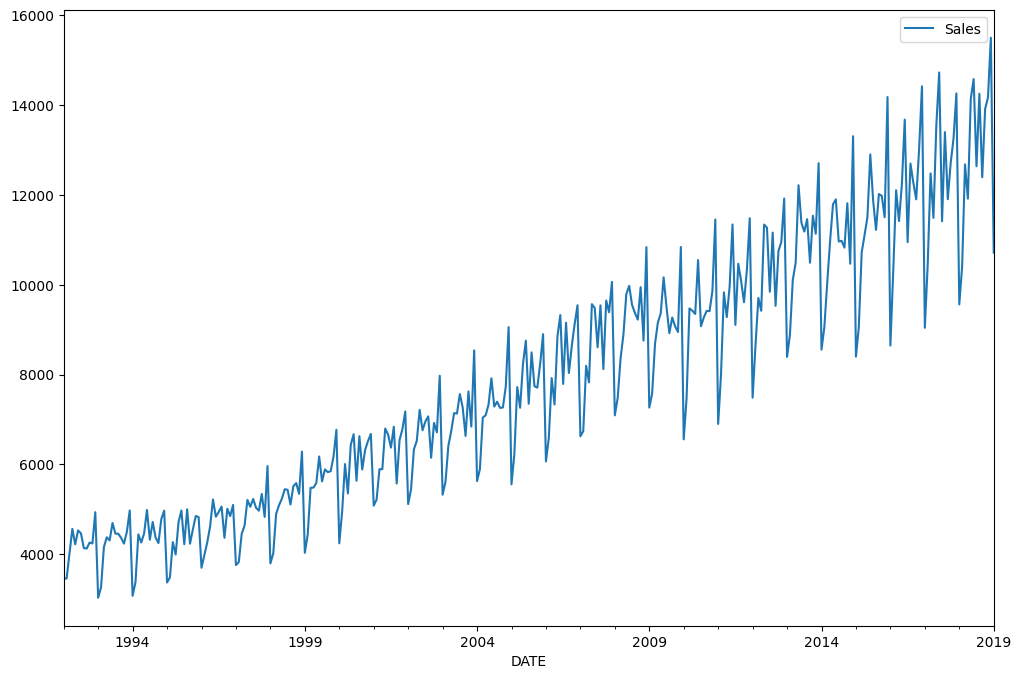

In [35]:
df.plot(figsize = (12,8))

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
results = seasonal_decompose(df['Sales'])

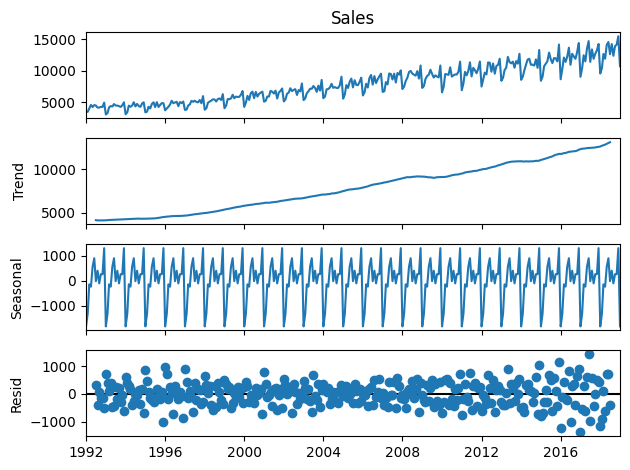

In [38]:
results.plot();

(276.0, 288.0)

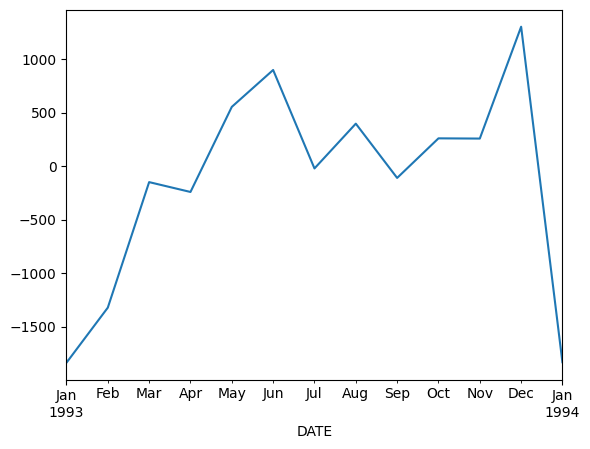

In [39]:
import matplotlib.pyplot as plt
results.seasonal.plot()
plt.xlim('1993-01-01','1994-01-01')
# year wise seasoanliy

In [40]:
# also wana look if rnn is able to detect seasonlity without explicitly telling 

In [41]:
len(df)
# monthly data

325

In [42]:
325-12

313

In [43]:
# predict 1 year into the future

In [44]:
train = df.iloc[:313]
test =  df.iloc[313:]

In [45]:
len(test)

12

In [46]:
## scaling data we want data to be in between 0 and 1 this data gives much
# better results while training 
# since data normally is ranging in between 4000 to 15000 this is a very wide range and can confuse
## neural network

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(train)

MinMaxScaler()

In [50]:
scaled_train = scaler.transform(train)

In [51]:
scaled_test = scaler.transform(test)

In [52]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [53]:
scaled_test
# cna have larger value htan 1 since test dataset can have larger value then train

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [54]:
## function that takes entire time series and gives out batcheS

In [55]:
n_input = 3
n_features = 1
## 2 entries taken as input and third one as output

In [56]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 2)
## first 2 inputs are from scaled train and 1 output from scaled_Train also
# so both first and second argument as scaled_train

# increasing batch size to 2

In [57]:
len(scaled_train)

313

In [58]:
len(generator)

155

In [59]:
len(scaled_train)- n_input

310

In [60]:
generator[0]
# 2 batches of train and 2 batches of output

(array([[[0.03658432],
         [0.03649885],
         [0.08299855]],
 
        [[0.03649885],
         [0.08299855],
         [0.13103684]]]),
 array([[0.13103684],
        [0.1017181 ]]))

In [61]:
x, y = generator[0]

In [62]:
x # first 2 values of train data # when length = 2
x

array([[[0.03658432],
        [0.03649885],
        [0.08299855]],

       [[0.03649885],
        [0.08299855],
        [0.13103684]]])

In [63]:
y # third value of train data
# smaller batch sizes lead to better results

array([[0.13103684],
       [0.1017181 ]])

<h4> what should be # inputs </h4>
the number of inputs should be given equal to number of points in which seasonality can be
detected

if seaosnality of year and monthly data then choose the 12 as number of inputs

if the n_inputs high then lareger data would be required to trian model correctly

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [65]:
n_input = 12
# to take in seasonal factor
n_features = 1
# defines the column which is 1, in y

train_generator = TimeseriesGenerator(scaled_train, scaled_train,length = n_input, batch_size = 1)

In [66]:
model = Sequential()
model.add(LSTM(150, activation = 'relu',input_shape = (n_input, n_features) ))
model.add(Dense(1))

In [67]:
model.compile(optimizer = 'adam', loss = 'mse')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
x, y = train_generator[0]

In [69]:
model.fit_generator(train_generator , epochs = 25)

C:\Users\thaku\AppData\Local\Temp\ipykernel_6736\3846780106.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator , epochs = 25)


Epoch 1/25

301/301 [==============================] - 3s 4ms/step - loss: 0.0195
Epoch 2/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0098
Epoch 3/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 4/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0079
Epoch 5/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 6/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 7/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 8/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 9/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 10/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0024
Epoch 11/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 12/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 13/25
301/301 [===

In [70]:
model.history.history.keys()

dict_keys(['loss'])

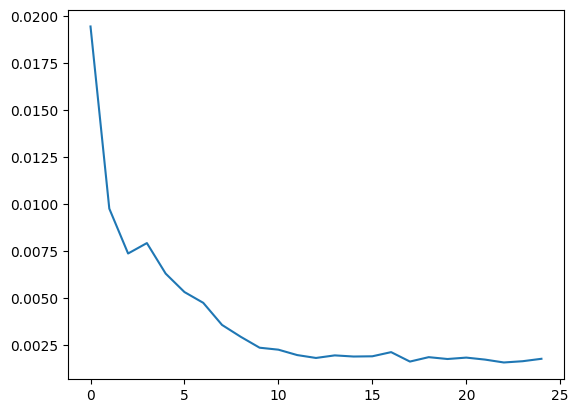

In [71]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'] )

In [78]:
x.shape, n_features,n_input

((1, 12, 1), 1, 12)

In [72]:
## at 15-16 we see convergence